## 검증 곡선으로 과대적합과 과소적합 조사

학습 곡선은 샘플 크기의 함수로 훈련 정확도와 테스트 정확도를 그렸다.</br>
검증 곡선은 모델 파라미터 값의 함수로 훈련 정확도와 테스트 정확도를 그린다.</br>

다음은 로지스틱회귀의 규제 매개변수 C를 사용해서 검증 곡선을 그린 것이다.

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df = pd.read_csv(   # 위스콘신 유방암 데이터셋 로딩
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', 
    header=None
)

x = df.loc[:, 2:].values    # 30개의 특성을 x에 할당
y = df.loc[:, 1].values     # 클래스 레이블을 y에 할당
y = LabelEncoder().fit_transform(y) # 클래스 레이블을 정수로 변환(악성: 1, 양성: 0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, stratify=y, random_state=1)


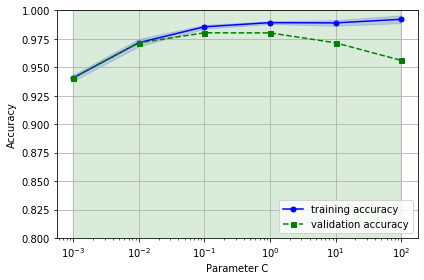

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(solver='liblinear', penalty='l2', random_state=1)
)

param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
    estimator=pipe_lr,
    X=x_train,
    y=y_train,
    param_name='logisticregression__C', # 평가 대상 매개변수를 LogisticRegression의 규제 매개변수 C로 설정
    param_range=param_range,            # 매개변수 값의 범위를 지정한다.
    # 기본적으로 validation_curve 함수는 계층별 k-겹 교차 검증을 사용하여 교차 검증 정확도를 계산한다.
    cv=10       # 교차 검증에 사용할 k값을 설정
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.mean(test_scores, axis=1)

# 지정된 C값에 대한 훈련 교차 검증 점수의 평균 정확도 변화를 표현
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# fill_between 함수로 훈련셋의 평균 정확도와 표준 편차를 그려서 추정 분산을 표현
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

# 지정된 C값에 대한 테스트 교차 검증 점수의 평균 정확도 변화를 표현
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
# fill_between 함수로 테스트셋의 평균 정확도와 표준 편차를 그려서 추정 분산을 표현
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()

규제 강도를 높이면(C값을 줄이면) 모델이 과소적합된다.</br>
규제 강도를 줄이면(C값을 올이면) 모델이 과대접합된다.</br>
가장 적절한 C 값은 0.01과 0.1 사이이다.</br>